First import all modules needed

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import open

bring in excel

In [11]:
df = pd.read_excel('DllData.xlsx', sheet_name='Raw Data')
df.head()
df.shape

(11347, 7)

clean data

In [12]:
df.dropna()

,Unique Identifier,DLL Business Unit,Application Value,Credit Application Received Date/Time,Credit Application Decision Date/Time,Contract Received in Operations Date/Time,Contract Ready for Payment Date/Time
0,12300000000000,Constr. Transp. & Industrial,497450.48,2021-12-14 11:09:00,2021-10-27 23:00:00,2021-12-29 09:02:00,2022-01-04 07:55:00
1,12300000000001,Constr. Transp. & Industrial,62616,2021-12-06 10:56:00,2021-12-15 16:46:00,2021-12-23 15:14:00,2022-01-04 08:22:00
2,12300000000002,Food & Agri,37054.8,2021-11-09 14:36:00,2021-11-16 15:26:00,2021-12-06 14:44:00,2022-01-04 08:45:00
3,12300000000003,Food & Agri,36000,2021-12-07 11:11:00,2021-12-07 13:58:00,2021-12-20 10:46:00,2022-01-04 09:19:00
4,12300000000004,Food & Agri,63500,2021-12-16 22:00:00,2021-12-17 17:20:00,2021-12-22 07:54:00,2022-01-04 10:10:00
...,...,...,...,...,...,...,...
11342,12300000011342,Office Technology,6064.11,2022-11-01 15:46:00,2022-12-29 14:10:00,2022-12-29 15:10:00,2022-12-30 12:44:00
11343,12300000011343,Office Technology,8147.71,2022-11-11 15:05:00,2022-12-23 16:22:00,2022-12-23 14:38:00,2022-12-30 12:58:00
11344,12300000011344,Office Technology,1301854.81,2022-12-19 09:08:00,2022-12-20 16:39:00,2022-12-23 13:30:00,2022-12-30 13:37:00
11345,12300000011345,Office Technology,1642.45,2022-12-30 09:42:00,2022-12-30 12:45:00,2022-12-30 11:37:00,2022-12-30 14:17:00


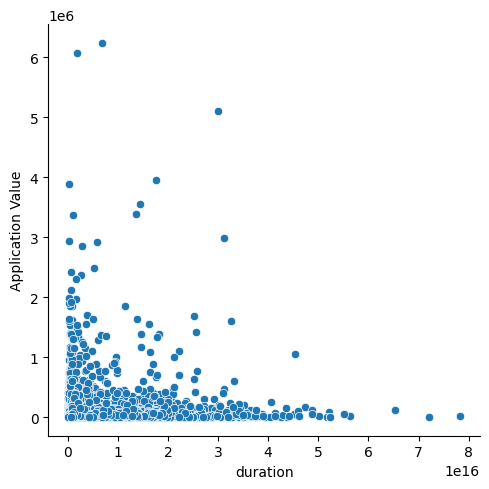

In [20]:
df = df[pd.to_numeric(df['Application Value'], errors='coerce').notnull()]
df['duration'] = df['Contract Ready for Payment Date/Time'] - df['Credit Application Received Date/Time']
df.head()
sns.relplot(data=df, y='Application Value', x='duration')
plt.show()

find means

In [22]:
# Select the column of interest
column_names = ['duration','Application Value']
for columns in column_names:
    column = df[columns]

    print(columns)

    # Calculate the mean
    mean = column.mean()
    print("Mean:", mean)

    # Calculate the median
    median = column.median()
    print("Median:", median)

    # Calculate the standard deviation
    std_dev = column.std()
    print("Standard deviation:", std_dev)

duration
Mean: 44 days 18:54:04.123511248
Median: 18 days 21:20:00
Range: NaT
Standard deviation: 67 days 13:15:02.434165004
Application Value
Mean: 65515.27139001616
Median: 28890.03
Range: 6235647.34
Standard deviation: 193795.40634106245


large differnce between mean and median suggest alot of out lires or large outlires

['Constr. Transp. & Industrial' 'Food & Agri' 'Healthcare'
 'Office Technology']
Constr. Transp. & Industrial
Mean :  101679.68022845275
median :  45000.0
Food & Agri
Mean :  40843.68413054744
median :  28000.0
Healthcare
Mean :  106511.2047547171
median :  25944.53
Office Technology
Mean :  68629.82730005366
median :  9758.13


,Unique Identifier,DLL Business Unit,Application Value,Credit Application Received Date/Time,Credit Application Decision Date/Time,Contract Received in Operations Date/Time,Contract Ready for Payment Date/Time,duration
0,12300000000000,Constr. Transp. & Industrial,497450.48,2021-12-14 11:09:00,2021-10-27 23:00:00,2021-12-29 09:02:00,2022-01-04 07:55:00,20 days 20:46:00
1,12300000000001,Constr. Transp. & Industrial,62616,2021-12-06 10:56:00,2021-12-15 16:46:00,2021-12-23 15:14:00,2022-01-04 08:22:00,28 days 21:26:00
8,12300000000008,Constr. Transp. & Industrial,15750,2021-12-23 08:14:00,2021-12-23 09:19:00,2021-12-24 11:42:00,2022-01-04 11:31:00,12 days 03:17:00
11,12300000000011,Constr. Transp. & Industrial,17750,2021-12-02 14:55:00,2021-12-22 12:05:00,2021-12-23 10:46:00,2022-01-04 11:40:00,32 days 20:45:00
12,12300000000012,Constr. Transp. & Industrial,23150,2021-12-14 14:19:00,2021-12-30 14:53:00,2021-12-31 10:49:00,2022-01-04 11:52:00,20 days 21:33:00


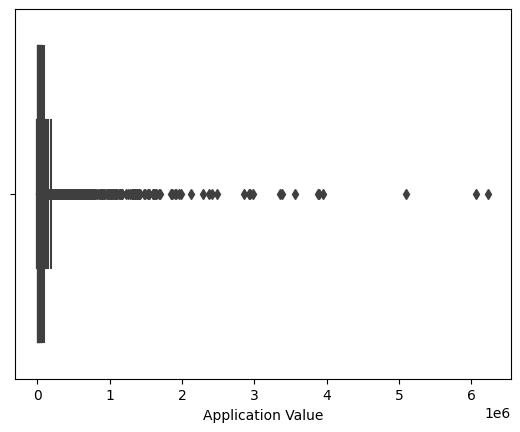

In [43]:
unique_values = df['DLL Business Unit'].unique()
print(unique_values)

for value in unique_values:
    print(value)
    filtered_df = df[df['DLL Business Unit'].str.contains(value)]
    filtered_df.head()
    column_mean = filtered_df["Application Value"].mean()
    print(f"Mean :  {column_mean}")
    column_median = filtered_df["Application Value"].median()
    print(f"median :  {column_median}")
    sns.boxplot(x=filtered_df["Application Value"])


filtered_df = df[df.eq('Constr. Transp. & Industrial'
).any(axis=1)]
filtered_df.head()